<a href="https://colab.research.google.com/github/dewinoorwening/Google-Project/blob/main/Google%20Project%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("googledrive")
library("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
if (!require(googledrive)) install.packages("googledrive")
if (!require(httpuv)) install.packages("httpuv")
library("googledrive")
library("httpuv")

Loading required package: googledrive

Loading required package: httpuv

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘httpuv’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘promises’, ‘later’




In [ ]:

if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) { #may need to update python version occasionally
  if (!require(R.utils)) install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}


Loading required package: R.utils

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘R.utils’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘packa

In [ ]:
library(tidyverse)
library(data.table)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ dplyr   1.0.10
✔ tibble  3.1.8      ✔ stringr 1.4.1 
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ purrr   0.3.5      

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [ ]:
getwd()

[1] "/content"

In [ ]:
list_file <- c("divvy_tripdata_202204.csv",
               "divvy_tripdata_202205.csv",
               "divvy_tripdata_202206.csv",
               "divvy_tripdata_202207.csv",
               "divvy_tripdata_202208.csv",
               "divvy_tripdata_202209.csv")

for (i in list_file){
  x <- drive_get(paste0("~/Colab Notebooks/Notebooks/",i))
  if (file.exists(paste0("/content/",i))){
    next
  }
  drive_download(x)
}

z <- read_csv("/content/divvy_tripdata_202204.csv")

attempt to access internal gargle data from: googledrive



attempt to access internal gargle data from: googledrive

attempt to access internal gargle data from: googledrive



✔ The input `path` resolved to exactly 1 file.

attempt to access internal gargle data from: googledrive



attempt to access internal gargle data from: googledrive

attempt to access internal gargle data from: googledrive



✔ The input `path` resolved to exactly 1 file.

attempt to access internal gargle data from: googledrive

File downloaded:

• divvy_tripdata_202205.csv <id: 1sbVX1PEKDRNcgxzpXOS-kbzREfbhwoUB>

Saved locally as:

• divvy_tripdata_202205.csv

attempt to access internal gargle data from: googledrive



attempt to access internal gargle data from: googledrive

attempt to access internal gargle data from: googledrive



✔ The input `path` resolved to exactly 1 file.

attempt to access internal gargle data from: googledrive

File downloaded:

• divvy_tripdata_202206.csv <id: 1S8OyfQbSxpP83KZ-Q1F

In [ ]:
list_file <- list.files(path="/content/")
list_file <- list_file[!list_file=="sample_data"]
col_names <- NULL
for (i in list_file){
    name <- fread(paste0("/content/",i)) %>% colnames()
    col_names <- rbind(col_names,name)
}
# nrow() unique
check <- col_names %>% as.data.frame() %>%
    duplicated() %>%
    sum()
if (check==11){
    paste0("Setiap kolom pada masing-masing dataset memiliki nama yang sama.")
} else {
    paste0("Terdapat nama kolom yang berbeda pada masing-masing dataset.")
}

[1] "Terdapat nama kolom yang berbeda pada masing-masing dataset."

In [ ]:
list_file <- list.files(path="/content/")
list_file <- list_file[!list_file=="sample_data"]
divvy <- NULL
for (i in list_file){
    data <- fread(paste0("/content/",i), na.strings = c("",NA))
    divvy <- rbind(divvy,data)
}
print("Import dataset selesai.")

[1] "Import dataset selesai."


In [ ]:
head(divvy)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member
1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual
E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member
C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual
097E76F3651B1AC1,classic_bike,2021-04-25 18:43:18,2021-04-25 18:43:59,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual


In [ ]:
# Define check_missing_value function
check_missing_value <- function(my_table){
    col_names <- my_table %>% summarise(across(everything(), ~ sum(is.na(.)))) %>% colnames()
    missing_value <- my_table %>% summarise(across(everything(), ~ sum(is.na(.)))) 
    value <- NULL
    for (i in 1:length(col_names)){
        value <- append(value, missing_value[,i])
    }
    data.frame("column_name" = col_names,
               "missing_value"=value,
               "missing_rate_percent"=round((value/nrow(my_table))*100,2)
               )
}

check_missing_value(divvy)

column_name,missing_value,missing_rate_percent
<chr>,<int>,<dbl>
ride_id,0,0.00
rideable_type,0,0.00
started_at,0,0.00
ended_at,0,0.00
start_station_name,533552,13.17
start_station_id,533552,13.17
end_station_name,574155,14.17
end_station_id,574155,14.17
start_lat,0,0.00


14% missing value terjadi pada data ini

In [ ]:
length_trip_s <- difftime(divvy[,ended_at],divvy[,started_at])
divvy[,length_trip_s:=length_trip_s]
divvy[length_trip_s<=0,list(length_trip_s)] %>% head()
inconsistent_rows <- divvy[length_trip_s<=0,list(length_trip_s)] %>% nrow()
paste0("Terdapat baris yang tidak konsisten yaitu perjalanan yang memiliki durasi 0 detik bahkan berhilai negatif.")
paste0("Jumlah baris yang tidak konsisten antara kolom started_at dengan ended_at: ",inconsistent_rows)

divvy <- divvy[length_trip_s>0]
paste0("Baris yang kurang konsisten telah dihilangkan")

length_trip_s
<drtn>
0 secs
0 secs
0 secs
0 secs
0 secs
0 secs


[1] "Terdapat baris yang tidak konsisten yaitu perjalanan yang memiliki durasi 0 detik bahkan berhilai negatif."

[1] "Jumlah baris yang tidak konsisten antara kolom started_at dengan ended_at: 373"

[1] "Baris yang kurang konsisten telah dihilangkan"

In [ ]:
start_station <- divvy[,c("start_station_id","start_station_name")]
colnames(start_station) <- c("station_id","station_name")
end_station <- divvy[,c("end_station_id","end_station_name")]
colnames(end_station) <- c("station_id","station_name")
station <- rbindlist(list(start_station, end_station)) %>% unique()
station[,total_station_name:=c(.N),by="station_id"]
station[,total_station_id:=c(.N),by="station_name"]
station_id_count <- station[,c("station_id","total_station_name")]
station_name_count <- station[,c("station_name","total_station_id")]

station_id_count[total_station_name>1] %>% head()
station_name_count[total_station_id>1] %>% head()

inconsistent_station_id <- station_id_count[total_station_name>1] %>% nrow()
inconsistent_station_name <- station_name_count[total_station_id>1] %>% nrow()
paste0("Ada ",inconsistent_station_id," station_id yang memiliki station_name lebih dari satu.")
paste0("Ada ",inconsistent_station_name," station_name yang memiliki station_id lebih dari satu.")

station_id,total_station_name
<chr>,<int>
637,3
TA1306000026,2
527,2
560,3
636,3
576,2


station_name,total_station_id
<chr>,<int>
Lawndale Ave & 111th St,2
Lakefront Trail & Bryn Mawr Ave,2
Prairie Ave & Garfield Blvd,2
Wabash Ave & 87th St,2
Calumet Ave & 71st St,2
Halsted St & 111th St,2


[1] "Ada 629 station_id yang memiliki station_name lebih dari satu."

[1] "Ada 32 station_name yang memiliki station_id lebih dari satu."

In [ ]:
library(jsonlite)

data <- fromJSON("https://gbfs.divvybikes.com/gbfs/en/station_information.json")

station <- data.table(
  station_id=data[["data"]][["stations"]][["station_id"]],
  name=data[["data"]][["stations"]][["name"]],
  lat=data[["data"]][["stations"]][["lat"]],
  lon=data[["data"]][["stations"]][["lon"]],
  short_name=data[["data"]][["stations"]][["short_name"]],
  capacity=data[["data"]][["stations"]][["capacity"]]
)
station %>% head()


Attaching package: ‘jsonlite’


The following object is masked from ‘package:R.utils’:

    validate


The following object is masked from ‘package:purrr’:

    flatten




station_id,name,lat,lon,short_name,capacity
<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
a3aabad8-a135-11e9-9cda-0a87ae2ba916,Sheffield Ave & Webster Ave,41.92154,-87.65382,TA1309000033,19
792ceba0-564f-4a2c-bcb5-90da781ffeef,State St & 95th St,41.72185,-87.62285,20104,15
a3ac7444-a135-11e9-9cda-0a87ae2ba916,Halsted St & North Branch St,41.89939,-87.64854,KA1504000117,15
a3b2905a-a135-11e9-9cda-0a87ae2ba916,Exchange Ave & 79th St,41.75173,-87.55281,580,11
a3a3f0c6-a135-11e9-9cda-0a87ae2ba916,Larrabee St & Menomonee St,41.91468,-87.64332,TA1306000007,15
a3afb401-a135-11e9-9cda-0a87ae2ba916,Monticello Ave & Irving Park Rd,41.95400,-87.71913,KA1504000139,15


In [ ]:
# covert latitude and longitude to 5 digit decimal
divvy[,start_lat:=(divvy[,start_lat] %>% round(5))]
divvy[,start_lng:=(divvy[,start_lng] %>% round(5))]
divvy[,end_lat:=(divvy[,end_lat] %>% round(5))]
divvy[,end_lng:=(divvy[,end_lng] %>% round(5))]

In [ ]:
# Left Join divvy with station to get more detail station_name
divvy <- merge(divvy, station[!is.na(short_name)], by.x="start_station_id", by.y="short_name", all.x=TRUE)
divvy[,start_station_name:=fcoalesce(divvy[,name],divvy[,start_station_name])]
divvy <- divvy[,-c("station_id","name","lat","lon","capacity")]
divvy <- merge(divvy, station[!is.na(short_name)], by.x="end_station_id", by.y="short_name", all.x=TRUE)
divvy[,end_station_name:=fcoalesce(divvy[,name],divvy[,end_station_name])]
divvy <- divvy[,-c("station_id","name","lat","lon","capacity")]
divvy <- merge(divvy, station, by.x=c("start_lat","start_lng"), by.y=c("lat","lon"), all.x=TRUE)
divvy[,start_station_name:=fcoalesce(divvy[,start_station_name],divvy[,name])]
divvy[,start_station_id:=fcoalesce(divvy[,start_station_id],divvy[,short_name])]
divvy <- divvy[,-c("station_id","name","short_name","capacity")]
divvy <- merge(divvy, station, by.x=c("end_lat","end_lng"), by.y=c("lat","lon"), all.x=TRUE)
divvy[,end_station_name:=fcoalesce(divvy[,end_station_name],divvy[,name])]
divvy[,end_station_id:=fcoalesce(divvy[,end_station_id],divvy[,short_name])]
divvy <- divvy[,-c("station_id","name","short_name","capacity")]
head(divvy)

end_lat,end_lng,start_lat,start_lng,end_station_id,start_station_id,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,length_trip_s
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<drtn>
NA,NA,41.65187,-87.53967,NA,20214,AFF9DEB0BC836CC9,docked_bike,2022-06-04 07:26:15,2022-06-05 08:26:16,Avenue O & 134th St,NA,casual,90001 secs
NA,NA,41.65187,-87.53967,NA,20214,F105E100709C76A5,docked_bike,2022-09-01 07:57:12,2022-09-02 08:57:13,Avenue O & 134th St,NA,casual,90001 secs
NA,NA,41.65667,-87.59880,NA,20212,0AB7142E6453CBEE,classic_bike,2022-05-30 20:47:38,2022-05-31 21:47:33,Altgeld Gardens,NA,casual,89995 secs
NA,NA,41.65667,-87.59880,NA,20212,07D8AE83EF96DC1F,classic_bike,2022-05-30 22:12:11,2022-05-31 23:12:06,Altgeld Gardens,NA,casual,89995 secs
NA,NA,41.65667,-87.59880,NA,20212,77603719D35490FF,classic_bike,2022-06-30 19:59:26,2022-07-01 20:59:22,Altgeld Gardens,NA,casual,89996 secs
NA,NA,41.65667,-87.59880,NA,20212,0453C80DD30D387E,classic_bike,2022-06-01 19:29:09,2022-06-02 20:29:03,Altgeld Gardens,NA,casual,89994 secs


In [ ]:
check_missing_value(divvy)

column_name,missing_value,missing_rate_percent
<chr>,<int>,<dbl>
end_lat,4546,0.11
end_lng,4546,0.11
start_lat,0,0.00
start_lng,0,0.00
end_station_id,573999,14.17
start_station_id,533531,13.17
ride_id,0,0.00
rideable_type,0,0.00
started_at,0,0.00


In [ ]:
library("lubridate")
# create day_of_week column
divvy[,day_of_week:=started_at %>% lubridate::wday(,week_start = getOption("lubridate.week.start", 1)) %>%
     factor(levels = 1:7,
            labels = c("Sen", "Sel", "Rab", "Kam", "Jum", "Sab", "Min"))] 
divvy[,month:=started_at %>% month() %>%
     factor(levels = 1:12)]

# Change membership value
divvy[member_casual=="casual",member_casual:="Casual Members"]
divvy[member_casual=="member",member_casual:="Annual Members"]
divvy[rideable_type=="docked_bike",rideable_type:="Docked Bike"]
divvy[rideable_type=="classic_bike",rideable_type:="Classic Bike"]
divvy[rideable_type=="electric_bike",rideable_type:="Electric Bike"]

# add hour started_at column
divvy[,hour:=hour(started_at) %>% factor(level=0:23)]

# Calculate distance from latitude and longitude
if (!require(geosphere)) install.packages("geosphere")
library(geosphere)
divvy[,distance:=distHaversine(divvy[,c("start_lat","start_lng")],
                               divvy[,c("end_lat","end_lng")])]

Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: geosphere

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘geosphere’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sp’




In [ ]:
# Install "Airbnb" ggplot theme
devtools::install_github("ricardo-bion/ggtech", 
                          dependencies=TRUE)
library(ggtech)

# Plot size function
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

Rttf2pt1    (NA -> 1.3.11) [CRAN]
extrafontdb (NA -> 1.0   ) [CRAN]
extrafont   (NA -> 0.18  ) [CRAN]


Installing 3 packages: Rttf2pt1, extrafontdb, extrafont

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/Rtmp50r4cV/remotes4b1aff3c45/ricardo-bion-ggtech-4d6282f/DESCRIPTION’ ... OK
* preparing ‘ggtech’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘ggtech_0.1.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



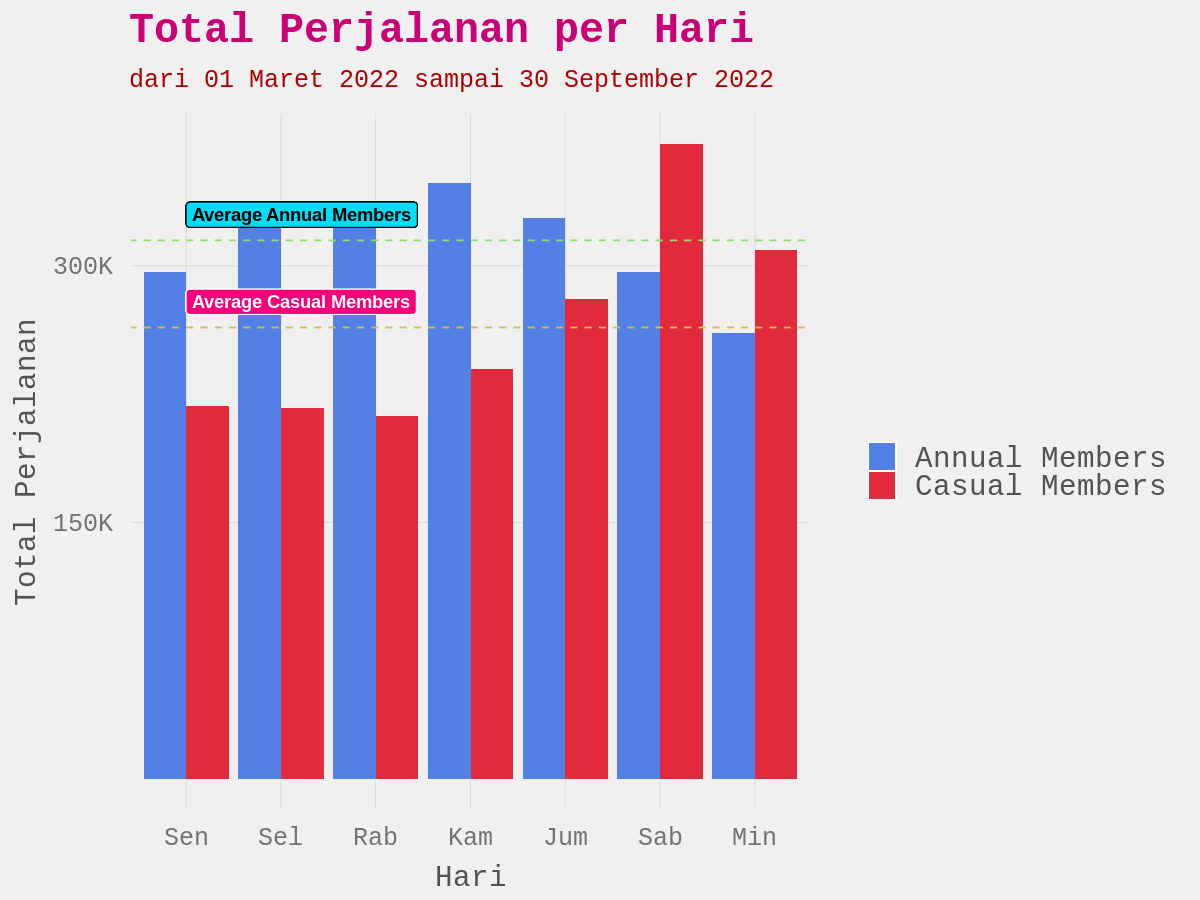

In [ ]:
data_plot <- divvy[,c(.N),by=c("day_of_week","member_casual")]
casual_mean <- data_plot[member_casual=="Casual Members",mean(V1)]
member_mean <- data_plot[member_casual=="Annual Members",mean(V1)]

fig(10,7.5)
ggplot(data=data_plot)+
    theme_airbnb_fancy()+
    scale_fill_tech(theme="google")+
    theme(plot.title = element_text(face="bold",colour="#c90076"),
         plot.subtitle = element_text(colour="#aa0404"))+
    geom_bar(mapping=aes(x=day_of_week, y=V1, fill=member_casual), position="dodge", stat="identity")+
    geom_hline(aes(yintercept=casual_mean),colour="#dcb84c",linetype="dashed")+
    geom_hline(aes(yintercept=member_mean),colour="#8de068",linetype="dashed")+
    geom_label(aes(x=1,y=casual_mean+15000, label="Average Casual Members", hjust=0), colour="White", fill="#f7007a", fontface="bold")+
    geom_label(aes(x=1,y=member_mean+15000, label="Average Annual Members", hjust=0), colour="Black", fill="#00def7", fontface="bold")+
    labs(x='Hari', y='Total Perjalanan', 
         title='Total Perjalanan per Hari',
         subtitle="dari 01 Maret 2022 sampai 30 September 2022")+
    scale_y_continuous(breaks = c(150000, 300000), labels = c("150K", "300K"))

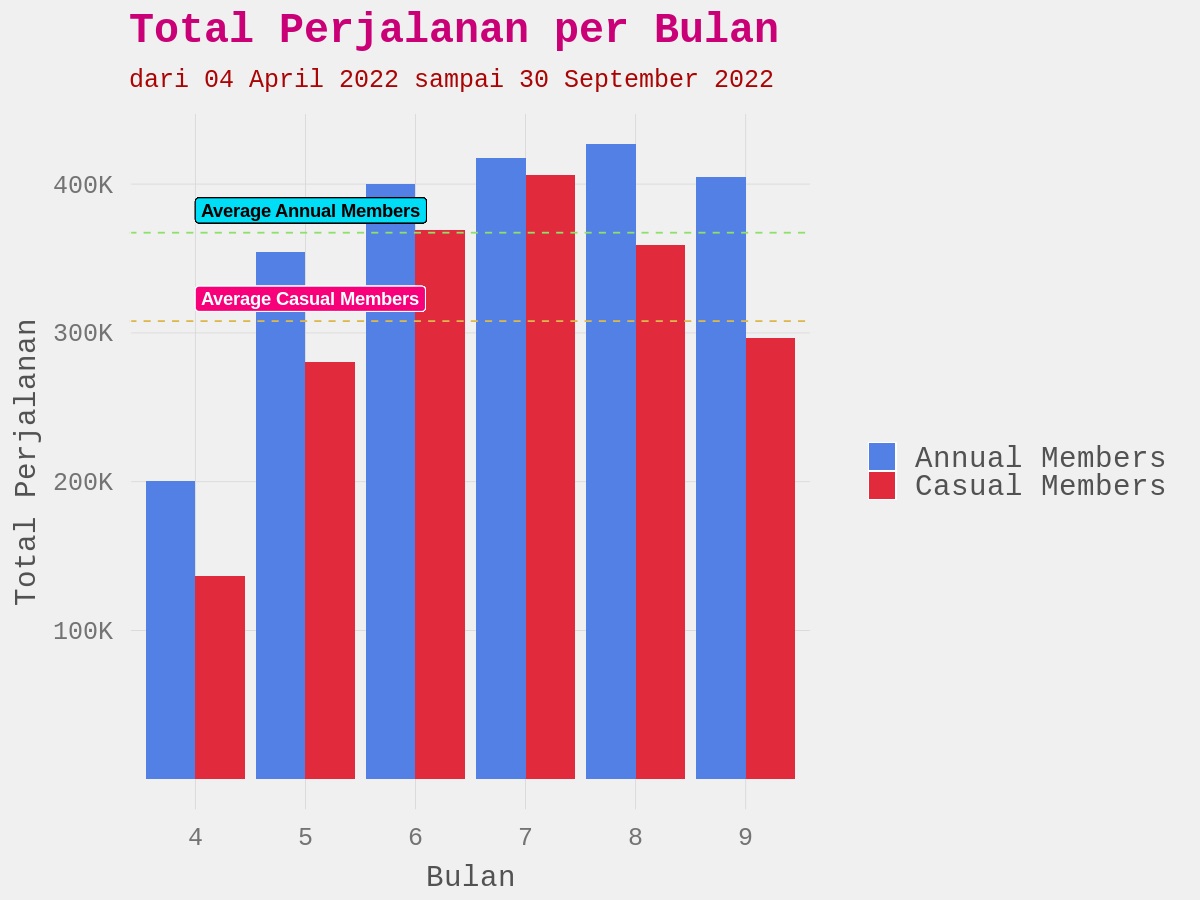

In [ ]:
data_plot <- divvy[,c(.N),by=c("month","member_casual")]
casual_mean <- data_plot[member_casual=="Casual Members",mean(V1)]
member_mean <- data_plot[member_casual=="Annual Members",mean(V1)]

fig(10,7.5)
ggplot(data=data_plot)+
    theme_airbnb_fancy()+
    scale_fill_tech(theme="google")+
    theme(plot.title = element_text(face="bold",colour="#c90076"),
         plot.subtitle = element_text(colour="#aa0404"))+
    geom_bar(mapping=aes(x=month, y=V1, fill=member_casual), position="dodge", stat="identity")+
    geom_hline(aes(yintercept=casual_mean),colour="#dcb84c",linetype="dashed")+
    geom_hline(aes(yintercept=member_mean),colour="#8de068",linetype="dashed")+
    geom_label(aes(x=1,y=casual_mean+15000, label="Average Casual Members", hjust=0), colour="white", fill="#f7007a", fontface="bold")+
    geom_label(aes(x=1,y=member_mean+15000, label="Average Annual Members", hjust=0), colour="Black", fill="#00def7", fontface="bold")+
    labs(x='Bulan', y='Total Perjalanan', 
         title='Total Perjalanan per Bulan',
         subtitle="dari 04 April 2022 sampai 30 September 2022")+
    scale_y_continuous(breaks = c(100000, 200000, 300000, 400000), labels = c("100K", "200K", "300K", "400K"))

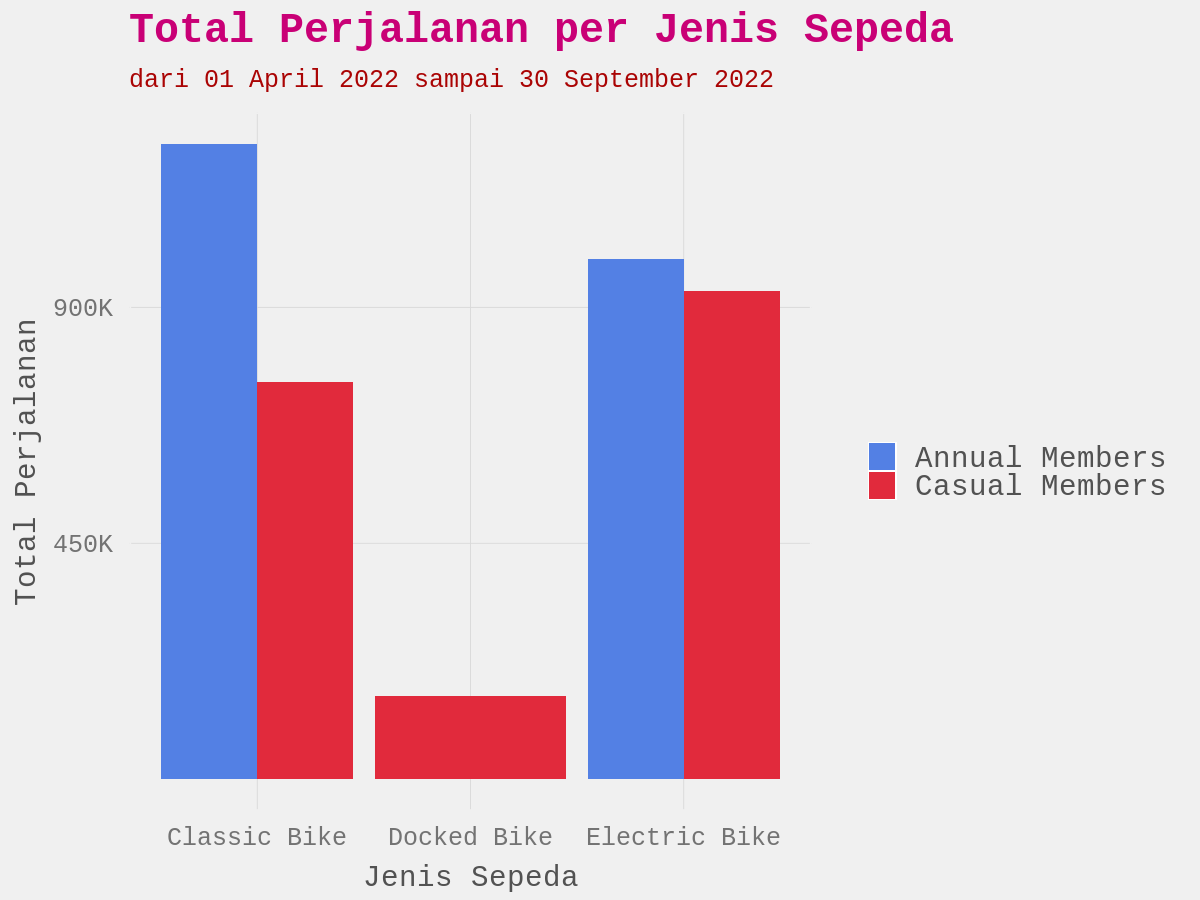

In [ ]:
data_plot <- divvy[,c(.N),by=c("rideable_type","member_casual")]

fig(10,7.5)
ggplot(data=data_plot)+
    theme_airbnb_fancy()+
    scale_fill_tech(theme="google")+
    theme(plot.title = element_text(face="bold",colour="#c90076"),
         plot.subtitle = element_text(colour="#aa0404"))+
    geom_bar(mapping=aes(x=rideable_type, y=V1, fill=member_casual), position="dodge", stat="identity")+
    labs(x='Jenis Sepeda', y='Total Perjalanan', 
         title='Total Perjalanan per Jenis Sepeda',
         subtitle="dari 01 April 2022 sampai 30 September 2022")+
    scale_y_continuous(breaks = c(450000, 900000, 1350000), labels = c("450K", "900K", "1.35M"))

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


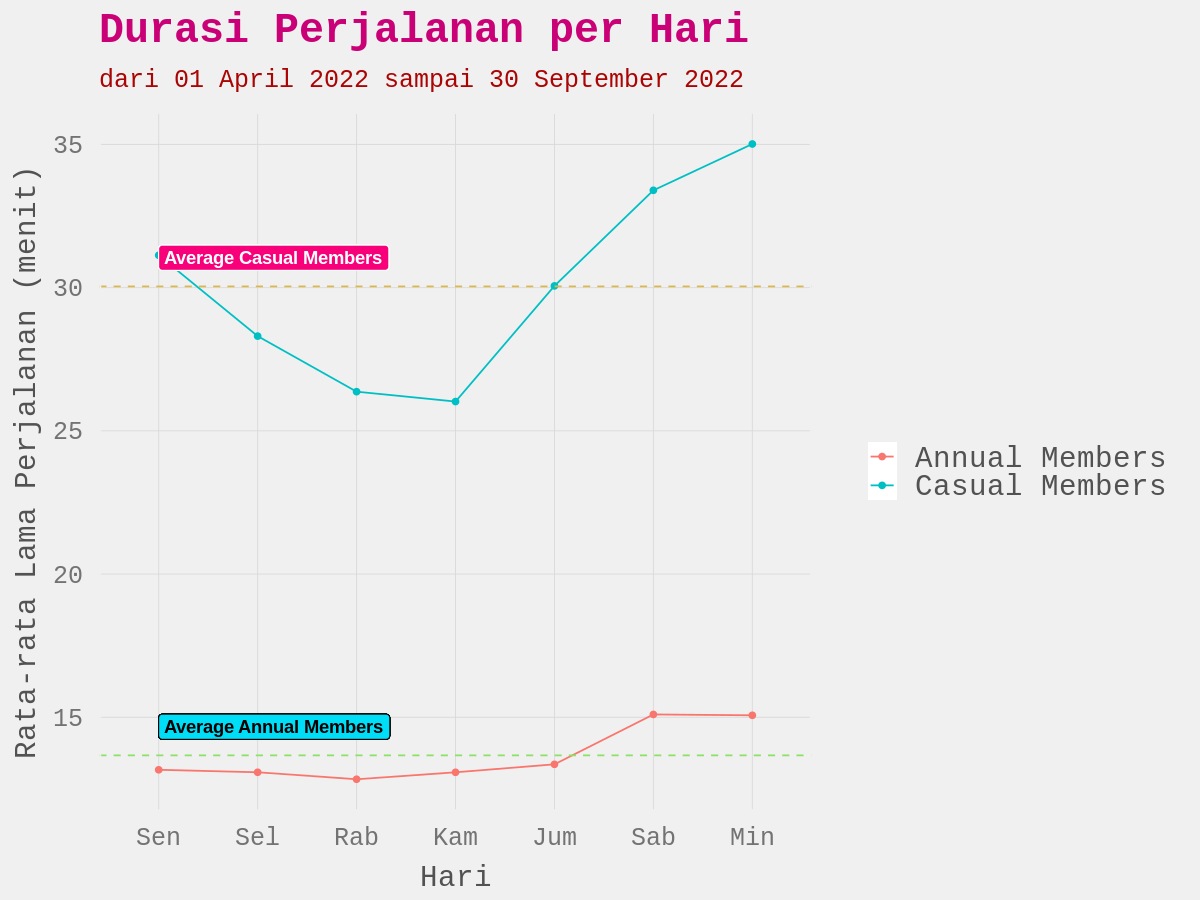

In [ ]:
data_plot <- divvy[,mean(length_trip_s/60),by=c("day_of_week","member_casual")]
casual_mean <- data_plot[member_casual=="Casual Members",mean(V1)]
member_mean <- data_plot[member_casual=="Annual Members",mean(V1)]
mean_diff <- ((casual_mean %>% as.numeric)/(member_mean %>% as.numeric)) %>% round(2)

fig(10,7.5)
ggplot(data=data_plot,mapping=aes(x=day_of_week, y=V1, color=member_casual, group=member_casual))+
    theme_airbnb_fancy()+
    scale_fill_tech(theme="google")+
    theme(plot.title = element_text(face="bold",colour="#c90076"),
         plot.subtitle = element_text(colour="#aa0404"))+
    geom_line()+
    geom_point()+
    geom_hline(aes(yintercept=casual_mean),colour="#dcb84c",linetype="dashed")+
    geom_hline(aes(yintercept=member_mean),colour="#8de068",linetype="dashed")+
    geom_label(aes(x=1,y=casual_mean+1, label="Average Casual Members", hjust=0), colour="white", fill="#f7007a", fontface="bold")+
    geom_label(aes(x=1,y=member_mean+1, label="Average Annual Members", hjust=0), colour="Black", fill="#00def7", fontface="bold")+
    labs(x='Hari', y='Rata-rata Lama Perjalanan (menit)', 
         title='Durasi Perjalanan per Hari',
         subtitle="dari 01 April 2022 sampai 30 September 2022")

Don't know how to automatically pick scale for object of type <difftime>.
Defaulting to continuous.


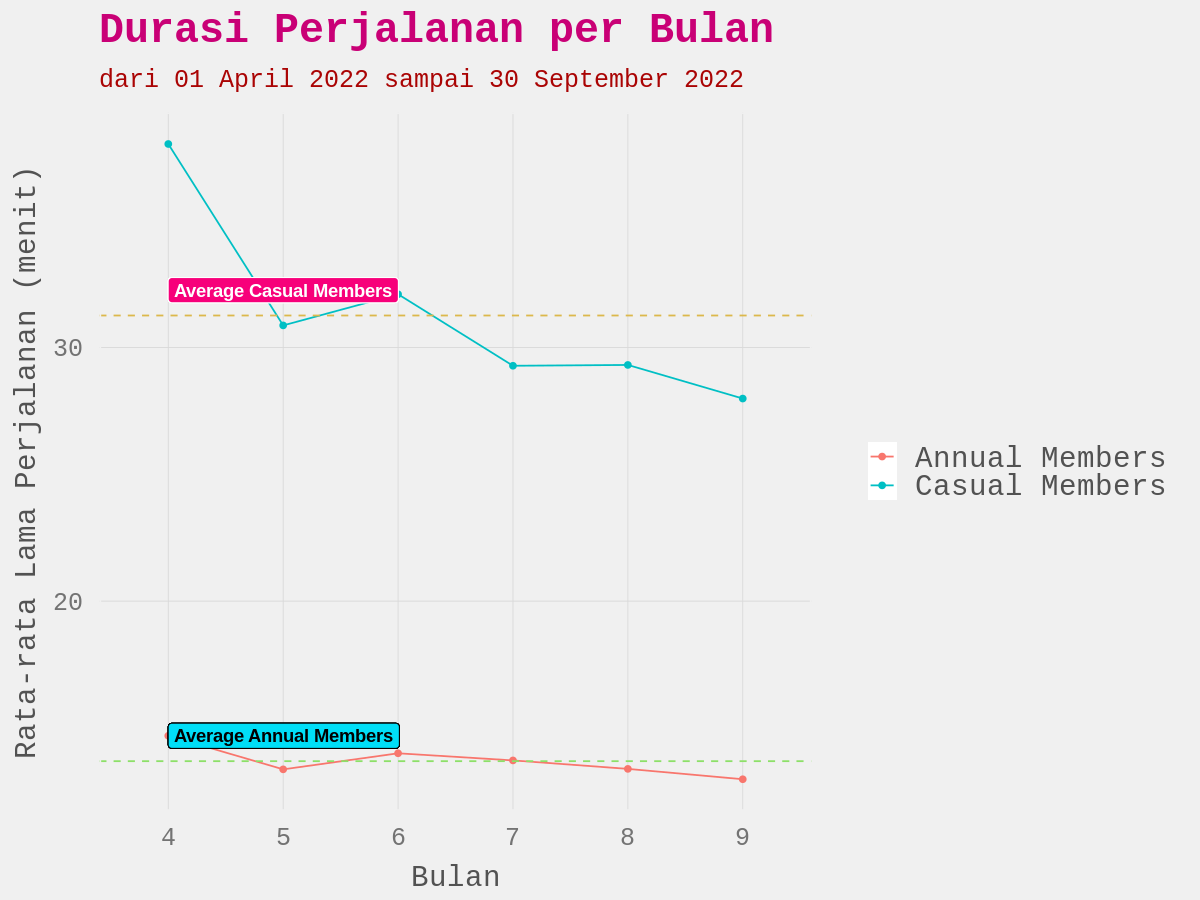

In [ ]:
data_plot <- divvy[,mean(length_trip_s/60),by=c("month","member_casual")]
casual_mean <- data_plot[member_casual=="Casual Members",mean(V1)]
member_mean <- data_plot[member_casual=="Annual Members",mean(V1)]
mean_diff <- ((casual_mean %>% as.numeric)/(member_mean %>% as.numeric)) %>% round(2)

fig(10,7.5)
ggplot(data=data_plot,mapping=aes(x=month, y=V1, color=member_casual, group=member_casual))+
    theme_airbnb_fancy()+
    scale_fill_tech(theme="google")+
    theme(plot.title = element_text(face="bold",colour="#c90076"),
         plot.subtitle = element_text(colour="#aa0404"))+
    geom_line()+
    geom_point()+
    geom_hline(aes(yintercept=casual_mean),colour="#dcb84c",linetype="dashed")+
    geom_hline(aes(yintercept=member_mean),colour="#8de068",linetype="dashed")+
    geom_label(aes(x=1,y=casual_mean+1, label="Average Casual Members", hjust=0), colour="white", fill="#f7007a", fontface="bold")+
    geom_label(aes(x=1,y=member_mean+1, label="Average Annual Members", hjust=0), colour="Black", fill="#00def7", fontface="bold")+
    labs(x='Bulan', y='Rata-rata Lama Perjalanan (menit)', 
         title='Durasi Perjalanan per Bulan',
         subtitle="dari 01 April 2022 sampai 30 September 2022")

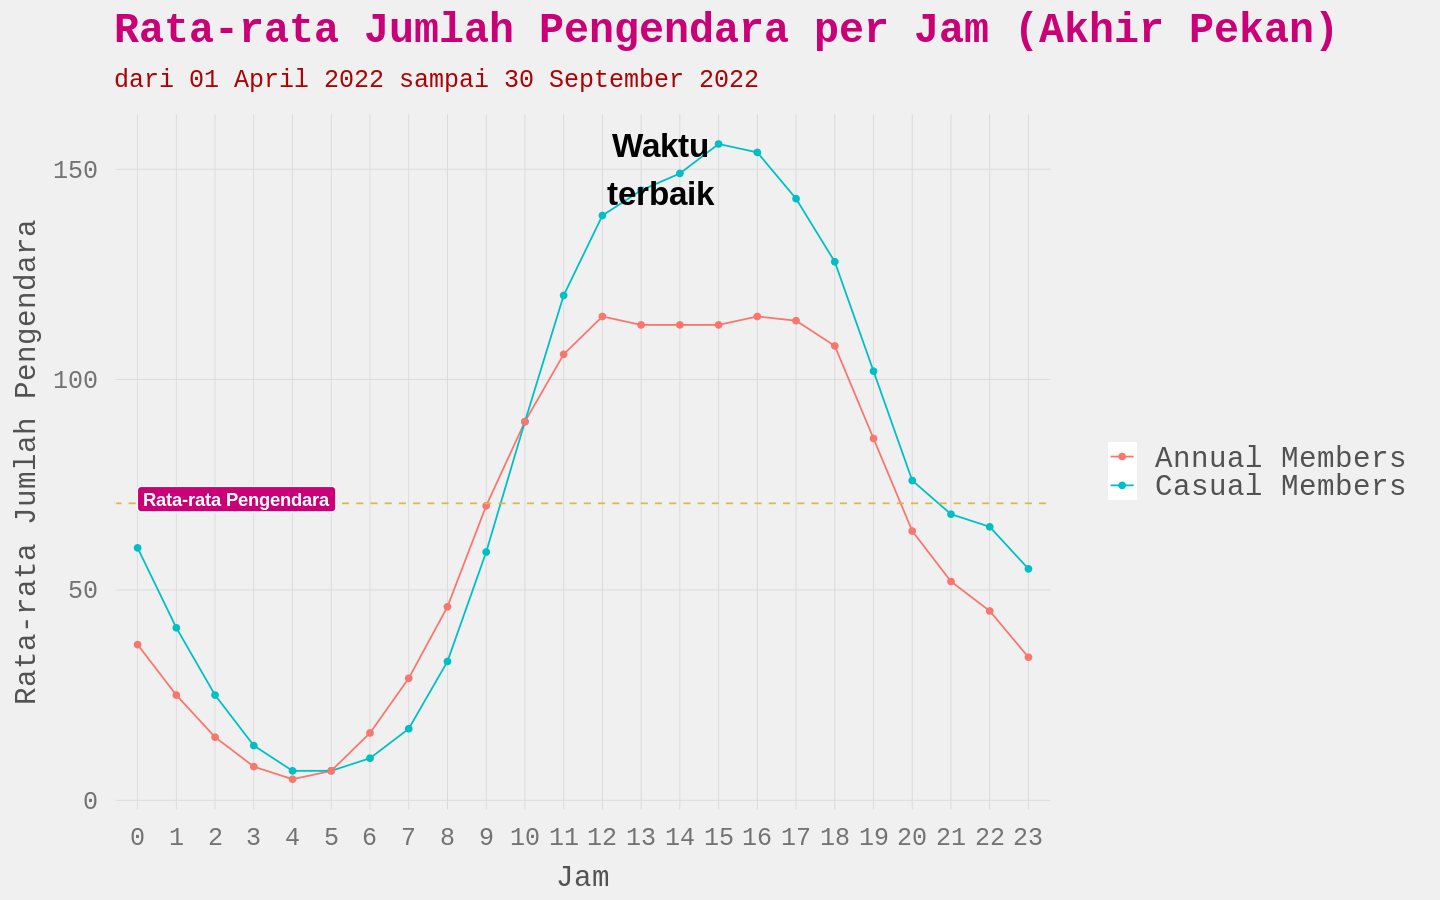

In [ ]:
data_plot <- divvy[day_of_week=="Sab" | day_of_week=="Min"][
    ,(c(.N)/365) %>% round(0),by=c("member_casual","hour")
]
mean <- data_plot[,mean(V1)]

fig(12,7.5)
ggplot(data=data_plot,mapping=aes(x=hour, y=V1, color=member_casual, group=member_casual))+
    theme_airbnb_fancy()+
    scale_fill_tech(theme="google")+
    theme(plot.title = element_text(face="bold",colour="#c90076"),
          plot.subtitle = element_text(colour="#aa0404"))+
    geom_line()+
    geom_point()+
    geom_hline(aes(yintercept=mean),colour="#dcb84c",linetype="dashed")+
    annotate("rect", xmin=10, xmax=21, ymin=-Inf, ymax=Inf, alpha=0, fill="Brown")+
    annotate("text", x=14.5, y=150, label="Waktu\nterbaik", size=7, fontface="bold", color="black")+
    geom_label(aes(x=1,y=mean+1, label="Rata-rata Pengendara", hjust=0), colour="white", fill="#c90076", fontface="bold")+
    labs(x='Jam', y='Rata-rata Jumlah Pengendara', 
         title='Rata-rata Jumlah Pengendara per Jam (Akhir Pekan)',
         subtitle="dari 01 April 2022 sampai 30 September 2022")

ERROR while rich displaying an object: Error in grid.Call.graphics(C_setviewport, vp, TRUE): invalid RGB specification

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. 

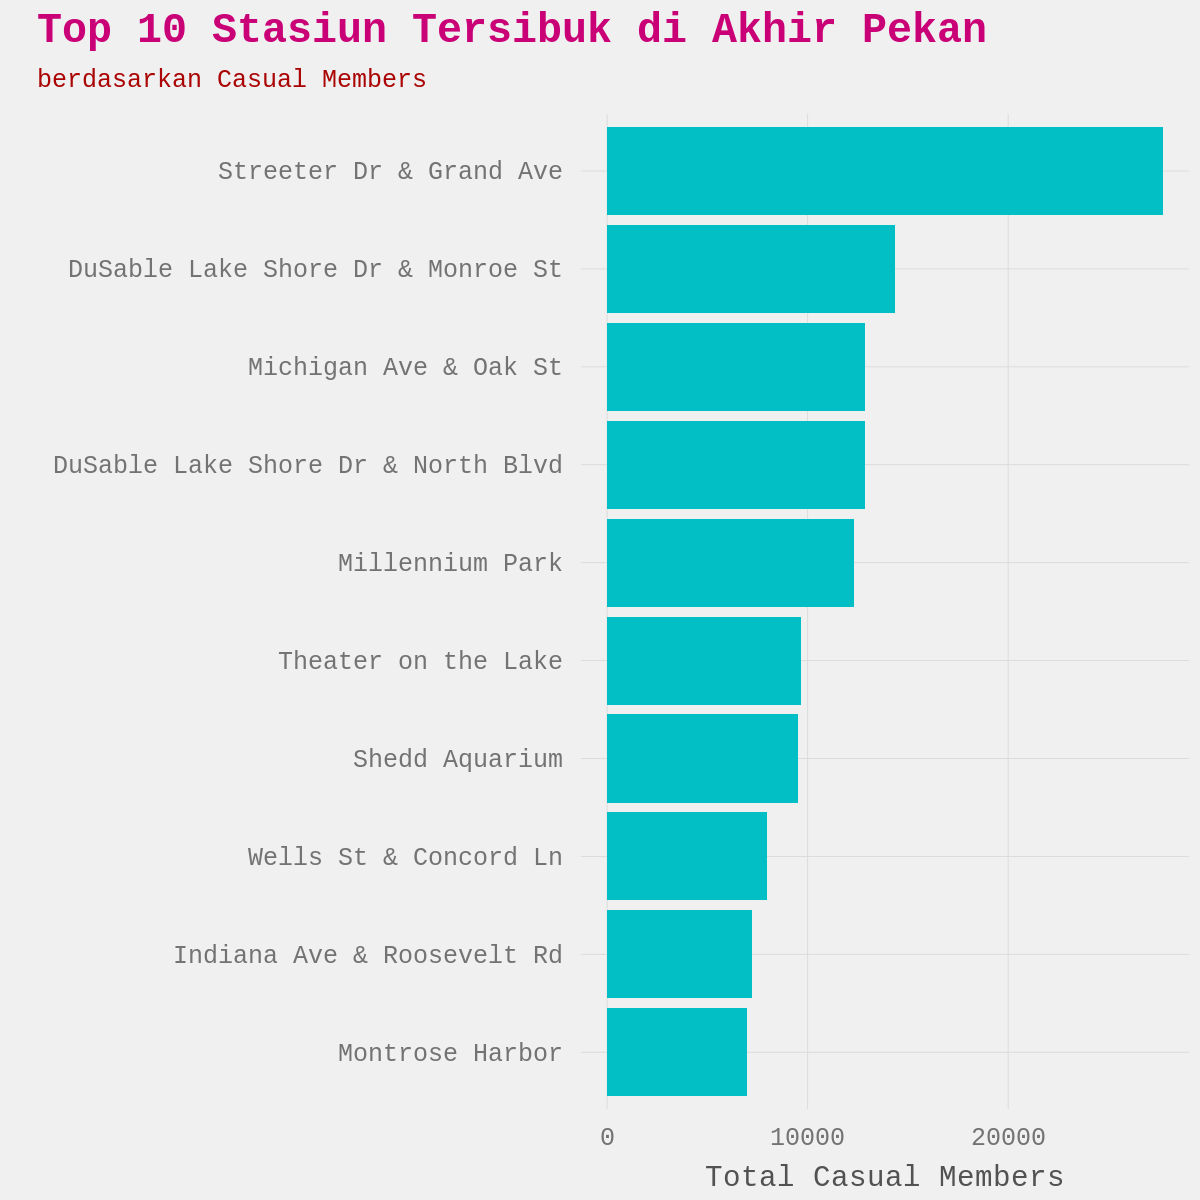

In [ ]:
busiest_station_weekend <- divvy[(day_of_week=="Sab" | day_of_week=="Min") & (!is.na(start_station_name)), 
      c(.N), 
      by=c("member_casual", "start_station_name")][
        member_casual=="Casual Members",c("start_station_name","V1")]
setorder(busiest_station_weekend, -V1)
busiest_station_weekend <- busiest_station_weekend[1:10]

busiest_station_weekday <- divvy[!(day_of_week=="Sab" | day_of_week=="Min") & (!is.na(start_station_name)), 
      c(.N), 
      by=c("member_casual", "start_station_name")][
        member_casual=="Casual Members",c("start_station_name","V1")]
setorder(busiest_station_weekday, -V1)
busiest_station_weekday <- busiest_station_weekday[1:10]

library("forcats")
fig(10,10)
ggplot(data=busiest_station_weekday, aes(y=fct_reorder(start_station_name, V1), x=V1))+
  theme_airbnb_fancy()+
  scale_fill_tech(theme="airbnb")+
  theme(plot.title = element_text(face="bold",colour="#c90076", hjust=1.6),
        plot.subtitle = element_text(colour="#aa0404", hjust=-2.45))+
  geom_col(fill="#01bfc4")+
  labs(x='Total Casual Members', y='', 
         title='Top 10 Stasiun Tersibuk di Akhir Pekan',
         subtitle="berdasarkan Casual Members")

fig(10,10)
ggplot(data=busiest_station_weekend, aes(y=fct_reorder(start_station_name, V1), x=V1))+
  theme_airbnb_fancy()+
  scale_fill_tech(theme="airbnb")+
  theme(plot.title = element_text(face="bold",colour="##c90076", hjust=1.6),
        plot.subtitle = element_text(colour="#aa0404", hjust=-2.45))+
  geom_col(fill="#01bfc4")+
  labs(x='Total Casual Members', y='', 
         title='Top 10 Stasiun Tersibuk di Akhir Pekan',
         subtitle="berdasarkan Casual Members")

In [ ]:
# Import library for K-Means Clustering
if (!require(cluster)) install.packages("cluster")
if (!require(factoextra)) install.packages("factoextra")
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization

Loading required package: cluster

Loading required package: factoextra

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘factoextra’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
data <- divvy[member_casual=="Casual Members", c("length_trip_s","distance")]
# Remove missing value
data <- data %>% na.omit()
# convert to numeric and from second to minutes
data[,length_trip_m := as.numeric(length_trip_s)/60]
data <- data[,c("length_trip_m","distance")]

# Delete outlier
Q <- quantile(data[,length_trip_m], probs=c(.25, .75), na.rm = FALSE)
iqr <- IQR(data[,length_trip_m])
up <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range
data <- subset(data, data[,length_trip_m] > (Q[1] - 1.5*iqr) & data[,length_trip_m] < (Q[2]+1.5*iqr))

Q <- quantile(data[,distance], probs=c(.25, .75), na.rm = FALSE)
iqr <- IQR(data[,distance])
up <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range
data <- subset(data, data[,distance] > (Q[1] - 1.5*iqr) & data[,distance] < (Q[2]+1.5*iqr))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


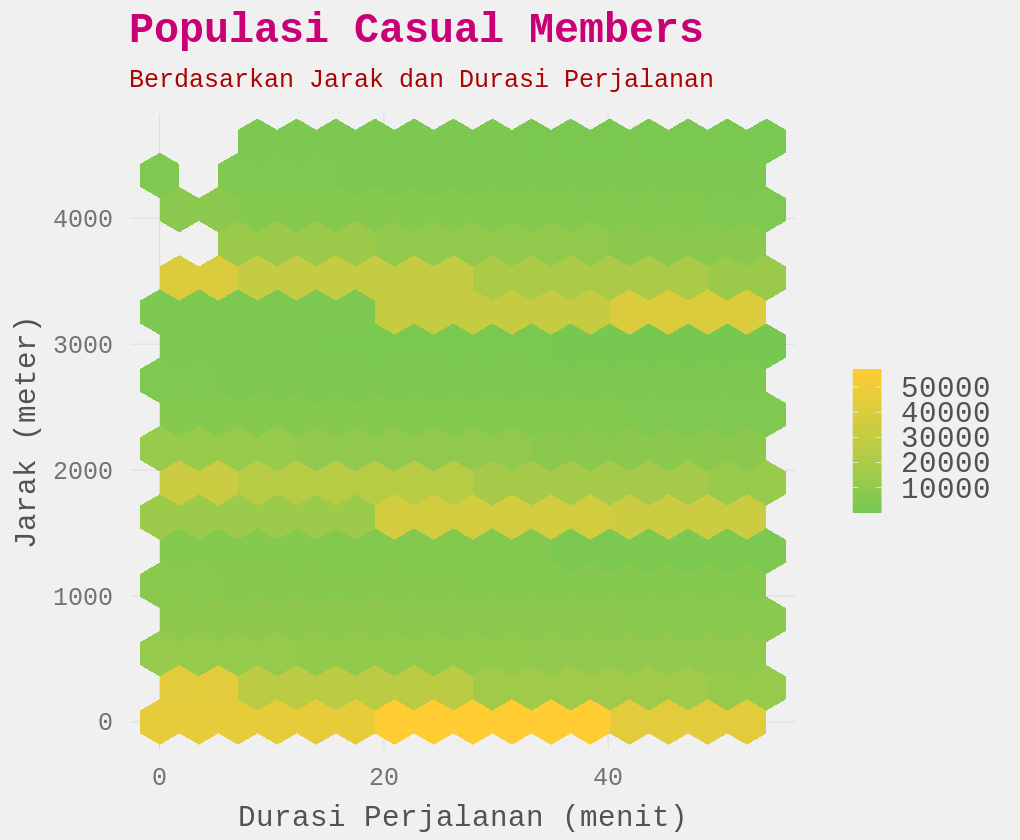

In [ ]:
if (!require(hexbin)) install.packages("hexbin")
library(hexbin)
fig(8.5,7)
ggplot(data, aes(x=length_trip_m, y=distance))+
  theme_airbnb_fancy()+
  scale_fill_tech(theme="google")+
  theme(plot.title = element_text(face="bold",colour="#c90076"),
        plot.subtitle = element_text(colour="#aa0404"))+
  stat_binhex(bins = 15)+
  scale_fill_gradient(low = "#76c851", high = "#ffcc32")+
  labs(x='Durasi Perjalanan (menit)', y='Jarak (meter)',
       title='Populasi Casual Members',
       subtitle="Berdasarkan Jarak dan Durasi Perjalanan")

In [ ]:
data_scale <- scale(data)
head(data_scale)

length_trip_m,distance
2.8637521,-0.04384902
-0.5470958,-0.13617636
0.6802071,-1.14155262
0.3142750,-1.14155262
-0.3663887,-1.14155262
1.2298580,-1.14155262


In [ ]:
model_kmeans <- kmeans(data_scale, centers = 4, nstart = 25)
data[, cluster:=model_kmeans$cluster]

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


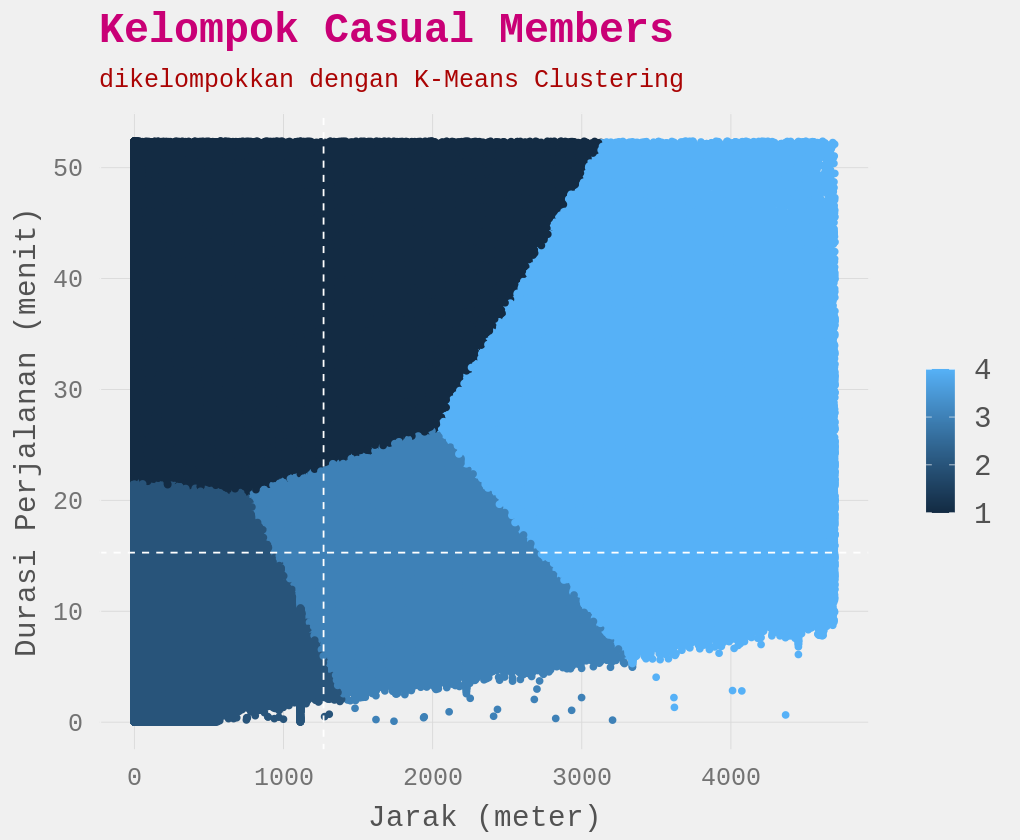

In [ ]:
distance_mean <- data[,mean(distance)]
length_trip_mean <- data[,mean(length_trip_m)]

ggplot(data=data, aes(x=distance, y=length_trip_m, colour=cluster))+
  theme_airbnb_fancy()+
  scale_fill_tech(theme="etsy")+
  theme(plot.title = element_text(face="bold",colour="#c90076"),
        plot.subtitle = element_text(colour="#aa0404"))+
        scale_fill_gradient(low = "#FB786F", high = "#ffcc32")+
  geom_point()+
  geom_hline(aes(yintercept=length_trip_mean),colour="white",linetype="dashed")+
  geom_vline(aes(xintercept=distance_mean),colour="white",linetype="dashed")+
  labs(x='Jarak (meter)', y='Durasi Perjalanan (menit)',
       title='Kelompok Casual Members',
       subtitle="dikelompokkan dengan K-Means Clustering",
       colour="Kelompok")